In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno 
# 이미지에 그릴 폰트
# 이건 맥용
# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
# window 한글 인코딩을 위해
plt.style.use('seaborn') # plt의 그림 표기는 seaborn으로
plt.figure(figsize=(10,4))
sns.set(font_scale = 2.5) # 모든  폰트 사이즈는 2.5

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)



import warnings # ignore
warnings.filterwarnings('ignore')

%matplotlib inline

## 2019.09.15. 데이터 분석
- 과정 정리

<pr>~아이디어 도출(9일) -> 방황(10일) -> 데이터 수집, 빠른 귀가(추석)(11일) -> 데이터 크롤링(12일) -> 데이터 전처리(13일)~ ->  데이터 분석 방향 확립(14, 15일) -> 데이터 분석, 시각화(15일) -> 발표 자료 만들기(16, 17, 18일) -> 끝

- 모든 피처 결측치 유무 확인
- 품종별 유기견 발생 현황
- 연간 유기견 발생 현황
- 2017-2018 월별 유기견 발생 현황
- 2017-2018 요일별 유기견 발생 현황
- 나이별 중성화 유무
- 제주도 월별 유기견 발생 현황
- 접수장소 시각화

In [ ]:
import pandas as pd
data = pd.read_excel('data.xlsx'); data.head() 

In [3]:
abs(data['나이'] - 2019).value_counts()

2016    33725
2018    30822
2015    22519
2014    16581
2013    15303
2017    14014
2012     7253
2011     6983
2010     3783
2008     3686
2006     2713
2009     2231
2007      594
2003      456
2004      456
2005      339
2001      253
2002      104
2000       37
1999       10
1998        9
1996        2
1987        2
1997        1
1993        1
1992        1
Name: 나이, dtype: int64

In [ ]:
# 일단 접수일을 datatime으로 바꾸고 month와 요일로 해보자

In [6]:
from datetime import datetime
data['접수일'] = pd.to_datetime(data['접수일'], format = '%Y%m%d')

In [7]:
data['접수월'] = [i.month for i in data['접수일']]

In [149]:
age_data['접수월'] = [i.month for i in age_data['접수일']]

In [150]:
data.head()

,종,나이,성별,무게,접수일,중성화 유무,접수장소,접수월,접수요일
0,골든 리트리버,1,M,24,2018-12-31,N,제주특별자치도,12,월
1,골든 리트리버,4,M,30,2018-12-29,N,충청북도 청주시,12,토
2,골든 리트리버,4,F,20,2018-12-29,U,경기도 시흥시,12,토
3,골든 리트리버,2,F,21,2018-12-28,N,제주특별자치도,12,금
4,골든 리트리버,4,F,22,2018-12-28,U,충청북도 충주시,12,금


In [15]:
# datatime을 요일로 바꾸자

t = ['월', '화', '수', '목', '금', '토', '일']
data['접수요일'] = [t[i.weekday()] for i in data['접수일']]

In [152]:
t = ['월', '화', '수', '목', '금', '토', '일']
age_data['접수요일'] = [t[i.weekday()] for i in age_data['접수일']]

In [16]:
data.head()

,종,나이,성별,무게,접수일,중성화 유무,접수장소,접수월,접수요일
0,골든 리트리버,1,M,24,2018-12-31,N,제주특별자치도,12,월
1,골든 리트리버,4,M,30,2018-12-29,N,충청북도 청주시,12,토
2,골든 리트리버,4,F,20,2018-12-29,U,경기도 시흥시,12,토
3,골든 리트리버,2,F,21,2018-12-28,N,제주특별자치도,12,금
4,골든 리트리버,4,F,22,2018-12-28,U,충청북도 충주시,12,금


In [153]:
age_data.head()

,종,나이,성별,접수일,중성화 유무,접수장소,접수월,접수요일
0,말티즈,4,F,2018-12-31,N,광주광역시 동구,12,월
1,라브라도 리트리버,1,M,2018-12-31,N,인천광역시 강화군,12,월
2,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월
3,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월
4,믹스견,1,F,2018-12-31,N,경상북도 상주시,12,월


In [6]:
import pandas as pd
data.to_excel('m_day2.xlsx')

In [8]:
data = pd.read_excel('m_day2.xlsx')

## 여기서부터 분석 시작
- 모든 피처 결측치 유무 확인

In [23]:
import pandas as pd
data = pd.read_excel('age_data.xlsx')

## 모든 피처 결측치 유무 확인

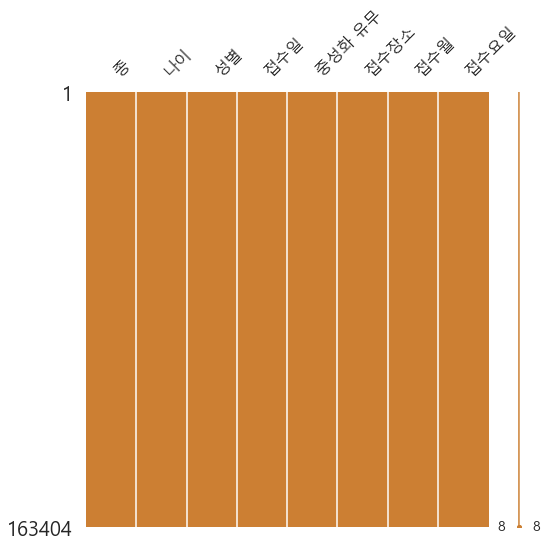

In [87]:
msno.matrix(df = data.iloc[:], figsize = (8, 8), color = (0.8, 0.5, 0.2))

# 품종별 유기견 발생 현황

In [11]:
# 상위 10개 종 보기
topdogs10 = data['종'].value_counts()[0:10]
topdogs10

믹스견        89184
푸들         14393
말티즈        14113
진돗개         7084
시츄          5045
포메라니안       3856
요크셔 테리어     3268
스피츠         2780
골든 리트리버     1814
치와와         1795
Name: 종, dtype: int64

In [26]:
data['성별'].value_counts()

M    85427
F    75759
Q     2218
Name: 성별, dtype: int64

In [41]:
data['접수장소'][data['종'].values == '믹스견'].value_counts()

제주특별자치도             9612
경기도 평택시             2202
경상남도 밀양시            1947
경기도 화성시             1602
경상남도 김해시            1459
경기도 남양주시            1288
경상북도 포항시            1215
경상남도 창원시 의창성산구      1136
전라북도 군산시            1113
전라북도 전주시            1107
충청남도 아산시            1084
전라북도 익산시            1018
충청남도 천안시             993
경상남도 창녕군             986
경상남도 사천시             960
경기도 포천시              901
경상남도 거제시             875
경기도 고양시              849
경상북도 경주시             800
강원도 강릉시              788
경상북도 울진군             761
경상남도 창원시 마산합포회원구     727
경기도 안산시              727
충청북도 청주시             722
부산광역시 강서구            690
충청남도 서산시             688
경기도 수원시              681
경상남도 함안군             678
대구광역시 달성군            626
경기도 파주시              622
                    ... 
부산광역시 동구              95
서울특별시 중구              91
충청북도 단양군              90
강원도 태백시               89
서울특별시 강남구             88
서울특별시 영등포구            88
서울특별시 용산구             81
경기도 과천시               81
충청남도 금산군              81


In [12]:
# 다 더하기
sum(topdogs10)

143332

In [14]:
# 10개 뒤의 갯수 다 더하기
sum(data['종'].value_counts()[10:])

18546

In [15]:
topdogs10.loc['기타'] = 18546
topdogs10

믹스견        89184
푸들         14393
말티즈        14113
진돗개         7084
시츄          5045
포메라니안       3856
요크셔 테리어     3268
스피츠         2780
골든 리트리버     1814
치와와         1795
기타         18546
Name: 종, dtype: int64

Text(0.5, 1.0, '품종별 유기견 발생 현황')

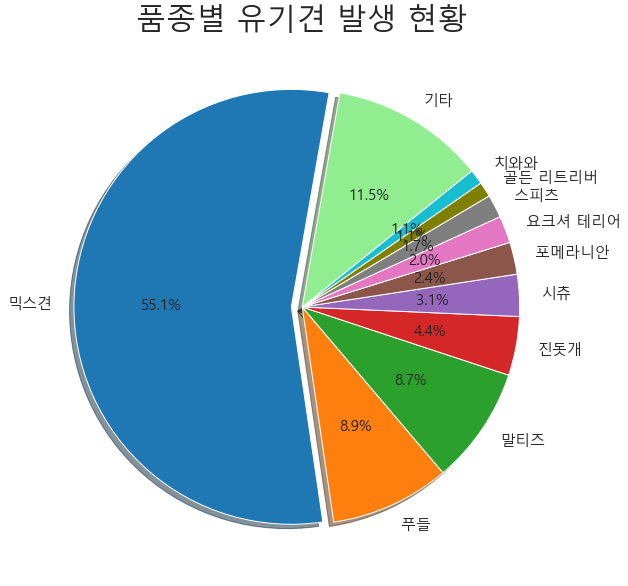

In [16]:
explode = (0.05,0,0,0,0,0,0,0,0,0,0)

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
          'tab:brown','tab:pink','tab:gray','olive','tab:cyan',
          'lightgreen']

topdogs10.plot.pie(shadow = True, label = '', figsize = (12, 10),
                  startangle=80, fontsize=15, autopct='%1.1f%%',
                  explode=explode, colors=colors)

plt.title('품종별 유기견 발생 현황')

## 연간 유기견 발생 현황

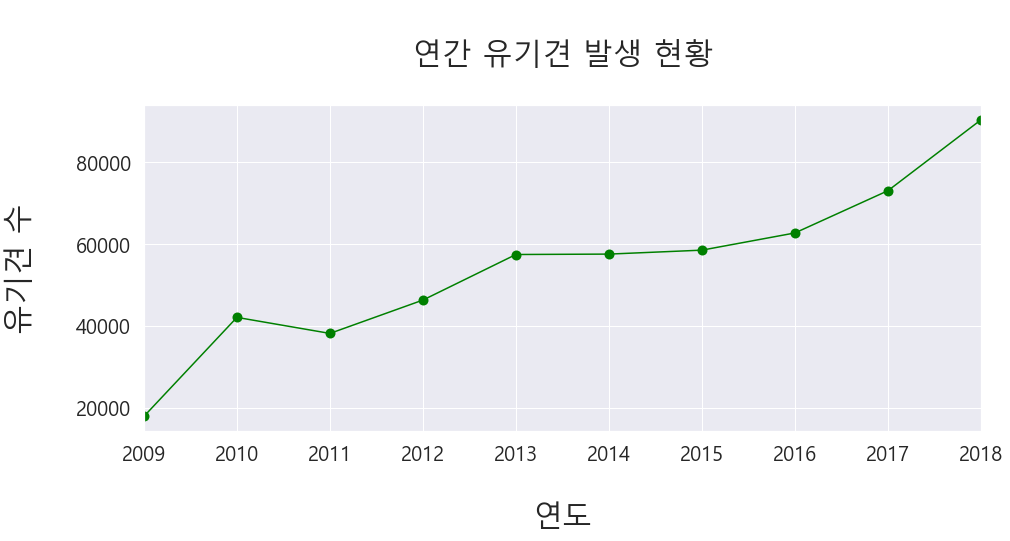

In [9]:
import pandas as pd

# 년도별만 가져와 보자  2009년부터 2018년까지(사이트가 2008년부터 데이터가 있음)
# 년도별은 사이트에서 수동으로
aban_year = {2009: 17912, 2010: 42104, 2011: 38185, 2012: 46337, 2013: 57471, 2014: 57570, 2015: 58534, 
             2016: 62740, 2017: 73062, 2018: 90375}

aban_year = pd.Series(aban_year)
aban_year.plot(grid = True,figsize = (15, 6), color='green', marker='o', fontsize=20,
               markersize=10)

plt.title('\n연간 유기견 발생 현황\n')
plt.xlabel('\n연도')
plt.ylabel('유기견 수\n')

plt.show()

## 2017~2018 월별 유기견 발생 현황

In [29]:
data.head()

,종,나이,성별,접수일,중성화 유무,접수장소,접수월,접수요일
0,말티즈,4,F,2018-12-31,N,광주광역시 동구,12,월
1,라브라도 리트리버,1,M,2018-12-31,N,인천광역시 강화군,12,월
2,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월
3,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월
4,믹스견,1,F,2018-12-31,N,경상북도 상주시,12,월


In [30]:
data['접수년도'] = [i.year for i in data['접수일']]

In [31]:
data['접수월'].value_counts().sort_index()

1     10947
2     10083
3     13163
4     13178
5     14172
6     13407
7     15870
8     16592
9     14921
10    14836
11    14031
12    12204
Name: 접수월, dtype: int64

In [32]:
data_2017 = data['접수월'][data['접수년도'].values == 2017]
data_2017

90355     12
90356     12
90357     12
90358     12
90359     12
90360     12
90361     12
90362     12
90363     12
90364     12
90365     12
90366     12
90367     12
90368     12
90369     12
90370     12
90371     12
90372     12
90373     12
90374     12
90375     12
90376     12
90377     12
90378     12
90379     12
90380     12
90381     12
90382     12
90383     12
90384     12
          ..
163374     1
163375     1
163376     1
163377     1
163378     1
163379     1
163380     1
163381     1
163382     1
163383     1
163384     1
163385     1
163386     1
163387     1
163388     1
163389     1
163390     1
163391     1
163392     1
163393     1
163394     1
163395     1
163396     1
163397     1
163398     1
163399     1
163400     1
163401     1
163402     1
163403     1
Name: 접수월, Length: 73049, dtype: int64

In [33]:
data_2018 = data['접수월'][data['접수년도'].values == 2018]
data_2018

0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12
20       12
21       12
22       12
23       12
24       12
25       12
26       12
27       12
28       12
29       12
         ..
90325     1
90326     1
90327     1
90328     1
90329     1
90330     1
90331     1
90332     1
90333     1
90334     1
90335     1
90336     1
90337     1
90338     1
90339     1
90340     1
90341     1
90342     1
90343     1
90344     1
90345     1
90346     1
90347     1
90348     1
90349     1
90350     1
90351     1
90352     1
90353     1
90354     1
Name: 접수월, Length: 90355, dtype: int64

In [34]:
data_2017.value_counts().sort_index()

1     4555
2     4381
3     5478
4     5623
5     6103
6     5999
7     7544
8     8132
9     6904
10    6569
11    6190
12    5571
Name: 접수월, dtype: int64

In [36]:
data_2018.value_counts().sort_index()

1     6392
2     5702
3     7685
4     7555
5     8069
6     7408
7     8326
8     8460
9     8017
10    8267
11    7841
12    6633
Name: 접수월, dtype: int64

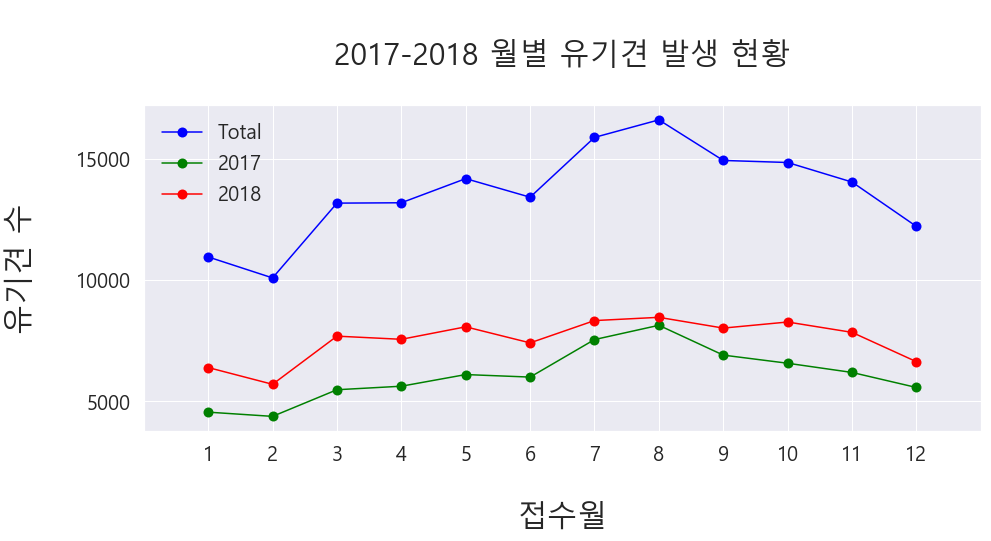

In [37]:
import numpy as np

name_list = (' ', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', ' ')

fig, ax = plt.subplots(1,1,figsize=(15,6))

data['접수월'].value_counts().sort_index().plot(grid = True,figsize = (15, 6), color='blue', marker='o', fontsize=20,
               markersize=10, label='Total')

data_2017.value_counts().sort_index().plot(grid = True,figsize = (15, 6), color='green', marker='o', fontsize=20,
               markersize=10, label='2017')

data_2018.value_counts().sort_index().plot(grid = True,figsize = (15, 6), color='red', marker='o', fontsize=20,
               markersize=10, label='2018')

plt.title('\n2017-2018 월별 유기견 발생 현황\n')
plt.xlabel('\n접수월')
plt.ylabel('유기견 수\n')
plt.xticks(np.arange(len(name_list)), name_list)
plt.legend(fontsize=20)

plt.show()

## 2017-2018 요일별 유기견 발생 현황

In [38]:
data_2017_d = data['접수요일'][data['접수년도'].values == 2017]
data_2017_d

90355     일
90356     일
90357     일
90358     일
90359     일
90360     일
90361     일
90362     일
90363     일
90364     일
90365     일
90366     일
90367     일
90368     일
90369     일
90370     일
90371     일
90372     일
90373     일
90374     일
90375     일
90376     일
90377     일
90378     일
90379     일
90380     일
90381     일
90382     일
90383     일
90384     일
         ..
163374    일
163375    일
163376    일
163377    일
163378    일
163379    일
163380    일
163381    일
163382    일
163383    일
163384    일
163385    일
163386    일
163387    일
163388    일
163389    일
163390    일
163391    일
163392    일
163393    일
163394    일
163395    일
163396    일
163397    일
163398    일
163399    일
163400    일
163401    일
163402    일
163403    일
Name: 접수요일, Length: 73049, dtype: object

In [39]:
data_2018_d = data['접수요일'][data['접수년도'].values == 2018]
data_2018_d

0        월
1        월
2        월
3        월
4        월
5        월
6        월
7        월
8        월
9        월
10       월
11       월
12       월
13       월
14       월
15       월
16       월
17       월
18       월
19       월
20       월
21       월
22       월
23       월
24       월
25       월
26       월
27       월
28       월
29       월
        ..
90325    월
90326    월
90327    월
90328    월
90329    월
90330    월
90331    월
90332    월
90333    월
90334    월
90335    월
90336    월
90337    월
90338    월
90339    월
90340    월
90341    월
90342    월
90343    월
90344    월
90345    월
90346    월
90347    월
90348    월
90349    월
90350    월
90351    월
90352    월
90353    월
90354    월
Name: 접수요일, Length: 90355, dtype: object

In [42]:
data_2017_d.value_counts()

월    16179
화    12244
수    11461
목    11443
금    11170
토     6219
일     4333
Name: 접수요일, dtype: int64

In [43]:
data_2018_d.value_counts()

월    19764
화    14942
수    14319
목    14293
금    13927
토     7907
일     5203
Name: 접수요일, dtype: int64

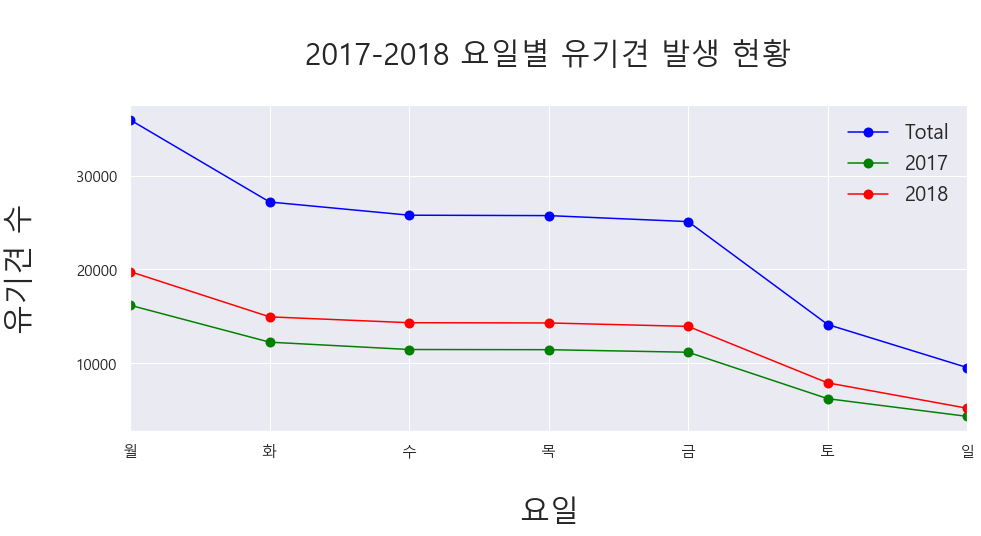

In [44]:
import numpy as np

name_list = (' ','월', '화', '수', '목', '금', '토', '일', ' ')

fig, ax = plt.subplots(1,1,figsize=(15,6))

data['접수요일'].value_counts().plot(grid = True,figsize = (15, 6), color='blue', marker='o', fontsize=20,
               markersize=10, label='Total')

data_2017_d.value_counts().plot(grid = True,figsize = (15, 6), color='green', marker='o', fontsize=15,
               markersize=10, label='2017')

data_2018_d.value_counts().plot(grid = True,figsize = (15, 6), color='red', marker='o', fontsize=15,
               markersize=10, label='2018')

plt.title('\n2017-2018 요일별 유기견 발생 현황\n')
plt.xlabel('\n요일')
plt.ylabel('유기견 수\n')
# x = list(range(-1, len(name_list)-1))
# plt.xticks(x, name_list)
plt.legend(fontsize=20)

plt.show()

## 나이별 중성화 유무

In [45]:
data.head()

,종,나이,성별,접수일,중성화 유무,접수장소,접수월,접수요일,접수년도
0,말티즈,4,F,2018-12-31,N,광주광역시 동구,12,월,2018
1,라브라도 리트리버,1,M,2018-12-31,N,인천광역시 강화군,12,월,2018
2,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월,2018
3,믹스견,0,F,2018-12-31,N,경상북도 상주시,12,월,2018
4,믹스견,1,F,2018-12-31,N,경상북도 상주시,12,월,2018


In [47]:
Y = data.loc[data['중성화 유무']=='Y','나이'].value_counts().sort_index()
Y

0      593
1     1393
2     1851
3     1876
4     1056
5     1066
6      532
7      514
8      501
9      146
10     698
11      53
12     125
13      85
14      21
15      75
16       6
17       8
Name: 나이, dtype: int64

In [49]:
a = Y[10:]
a

10    698
11     53
12    125
13     85
14     21
15     75
16      6
17      8
18      0
Name: 나이, dtype: int64

In [50]:
Y = Y[:10]
Y

0     593
1    1393
2    1851
3    1876
4    1056
5    1066
6     532
7     514
8     501
9     146
Name: 나이, dtype: int64

In [51]:
sum(a)

1071

In [52]:
Y.loc['9세 이상'] = sum(a)
Y

0         593
1        1393
2        1851
3        1876
4        1056
5        1066
6         532
7         514
8         501
9         146
9세 이상    1071
Name: 나이, dtype: int64

In [53]:
Y = Y.values
Y

array([ 593, 1393, 1851, 1876, 1056, 1066,  532,  514,  501,  146, 1071],
      dtype=int64)

In [55]:
N = data.loc[data['중성화 유무']=='N','나이'].value_counts().sort_index()
N

0     38726
1     15501
2     14618
3     12168
4      5652
5      5277
6      2110
7      1786
8      1455
9       448
10     1653
11      146
12      330
13      251
14       94
15      168
16       24
17       12
18        5
Name: 나이, dtype: int64

In [56]:
a = N[10:]
N = N[:10]
N.loc['9세 이상'] = sum(a)
N

0        38726
1        15501
2        14618
3        12168
4         5652
5         5277
6         2110
7         1786
8         1455
9          448
9세 이상     2683
Name: 나이, dtype: int64

In [57]:
N = N.values
N

array([38726, 15501, 14618, 12168,  5652,  5277,  2110,  1786,  1455,
         448,  2683], dtype=int64)

In [58]:
U = data.loc[data['중성화 유무']=='U','나이'].value_counts().sort_index()
U

0     12634
1      8008
2      8731
3      7973
4      3365
5      4167
6      1812
7      1319
8      1448
9       226
10     1839
11       64
12      403
13       94
14       40
15      223
16       14
17       14
18        7
Name: 나이, dtype: int64

In [59]:
a = U[10:]
U = U[:10]
U.loc['9세 이상'] = sum(a)
U

0        12634
1         8008
2         8731
3         7973
4         3365
5         4167
6         1812
7         1319
8         1448
9          226
9세 이상     2698
Name: 나이, dtype: int64

In [60]:
U = U.values
U

array([12634,  8008,  8731,  7973,  3365,  4167,  1812,  1319,  1448,
         226,  2698], dtype=int64)

In [61]:
X = range(11)
X

range(0, 11)

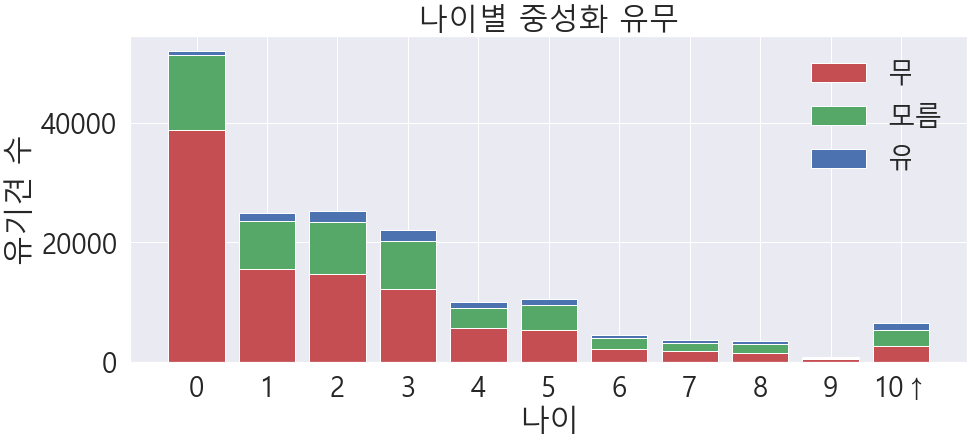

In [62]:
import numpy as np

plt.figure(figsize=(15,6))

plt.bar(X, N, color='r', label='무')
plt.bar(X, U, color='g', label='모름', bottom=N)
plt.bar(X, Y, color='b', label='유', bottom=N+U)

plt.title('나이별 중성화 유무')
plt.xlabel('나이')
plt.ylabel('유기견 수')
plt.legend()
plt.xticks(range(11), ['0','1','2','3','4','5','6','7','8','9','10↑'])

plt.show()

# 제주도 월별 유기견 발생 현황

In [63]:
Jeju = data.loc[data['접수장소']=='제주특별자치도',['접수월','접수년도']]
Jeju

,접수월,접수년도
17,12,2018
18,12,2018
19,12,2018
20,12,2018
21,12,2018
22,12,2018
23,12,2018
24,12,2018
25,12,2018
26,12,2018


In [64]:
Jeju_Total = Jeju['접수월'].value_counts().sort_index()
Jeju_Total

1      741
2      717
3      872
4      775
5      948
6      863
7      924
8      986
9      973
10    1056
11     982
12    1009
Name: 접수월, dtype: int64

In [65]:
Jeju_2017 = Jeju.loc[Jeju['접수년도'] == 2017, '접수월'].value_counts().sort_index()
Jeju_2017

1     267
2     222
3     301
4     251
5     380
6     378
7     404
8     486
9     446
10    437
11    451
12    482
Name: 접수월, dtype: int64

In [66]:
Jeju_2018 = Jeju.loc[Jeju['접수년도'] == 2018, '접수월'].value_counts().sort_index()
Jeju_2018

1     474
2     495
3     571
4     524
5     568
6     485
7     520
8     500
9     527
10    619
11    531
12    527
Name: 접수월, dtype: int64

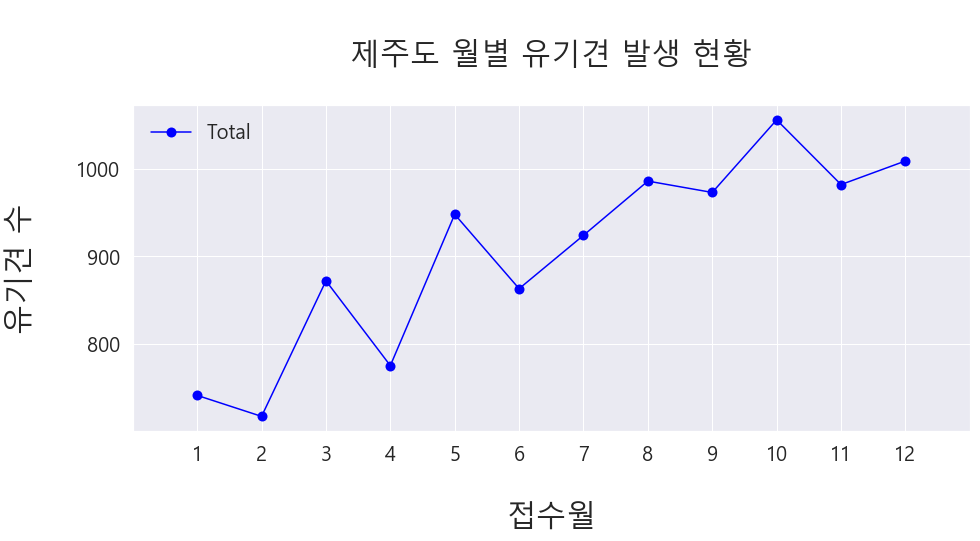

In [67]:
import numpy as np

name_list = (' ', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', ' ')

Jeju_Total.plot(grid = True,figsize = (15, 6), color='blue', marker='o', fontsize=20,
               markersize=10, label='Total')

# Jeju_2017.plot(grid = True,figsize = (15, 6), color='green', marker='o', fontsize=20,
#                markersize=10, label='2017')

# Jeju_2018.plot(grid = True,figsize = (15, 6), color='red', marker='o', fontsize=20,
#                markersize=10, label='2018')

plt.title('\n제주도 월별 유기견 발생 현황\n')
plt.xlabel('\n접수월')
plt.ylabel('유기견 수\n')

plt.xticks(np.arange(len(name_list)), name_list)
plt.legend(loc=2, fontsize=20)

plt.show()

## 접수장소 시각화

In [9]:
age_data['접수장소'].value_counts() # 봉수가 보내준 json 파일이랑 연동해서 map에 표시

제주특별자치도           10846
경기도 평택시            3640
경기도 화성시            2637
전라북도 전주시           2629
경상남도 밀양시           2412
경기도 수원시            2260
경기도 남양주시           2233
충청북도 청주시           2159
충청남도 천안시           2137
경기도 고양시            2122
경상남도 김해시           2044
경기도 안산시            2040
경상남도 창원시 의창성산구     1952
경상북도 포항시           1931
경기도 성남시            1917
대전광역시 서구           1736
강원도 원주시            1674
전라북도 익산시           1638
전라북도 군산시           1630
인천광역시 서구           1567
경기도 부천시            1564
대전광역시 유성구          1563
충청남도 아산시           1522
경기도 시흥시            1468
전라남도 목포시           1339
경기도 광주시            1338
경기도 포천시            1330
경기도 용인시            1328
경기도 파주시            1324
강원도 강릉시            1305
                  ...  
강원도 화천군             160
강원도 고성군             158
경상북도 의성군            156
강원도 영월군             156
전라북도 장수군            153
전라북도 진안군            151
전라남도 함평군            150
충청북도 단양군            149
강원도 양양군             146
전라남도 강진군            146
경상북도 청송군        

In [10]:
# 결측치 있나 확인
for i in age_data['접수장소'].unique():
    print(i)

광주광역시 동구
인천광역시 강화군
경상북도 상주시
대전광역시 동구
서울특별시 중랑구
경기도 양주시
경상북도 안동시
강원도 춘천시
부산광역시 영도구
서울특별시 성동구
제주특별자치도
경상남도 거창군
경상남도 김해시
전라남도 영광군
전라남도 목포시
전라북도 부안군
충청남도 홍성군
충청남도 천안시
충청북도 보은군
강원도 강릉시
경기도 포천시
경기도 광주시
경기도 구리시
경기도 동두천시
울산광역시 북구
대전광역시 대덕구
인천광역시 계양구
인천광역시 남동구
인천광역시 미추홀구
대구광역시 달성군
부산광역시 기장군
부산광역시 연제구
부산광역시 사하구
부산광역시 부산진구
부산광역시 서구
서울특별시 송파구
서울특별시 강서구
서울특별시 노원구
서울특별시 성북구
서울특별시 동대문구
서울특별시 종로구
경기도 화성시
대구광역시 달서구
대구광역시 남구
대구광역시 동구
서울특별시 마포구
세종특별자치시
경상남도 창원시 의창성산구
경상남도 합천군
경상남도 거제시
경상남도 진주시
경상남도 창원시 마산합포회원구
경상북도 울진군
경상북도 청도군
경상북도 영덕군
경상북도 경산시
경상북도 영천시
전라남도 함평군
전라남도 무안군
전라북도 정읍시
전라북도 전주시
충청남도 당진시
충청남도 예산군
충청남도 청양군
충청남도 논산시
충청남도 보령시
충청남도 공주시
충청북도 청주시
충청북도 진천군
충청북도 영동군
충청북도 제천시
충청북도 충주시
강원도 홍천군
강원도 태백시
경기도 이천시
경기도 파주시
경기도 용인시
경기도 의왕시
경기도 시흥시
경기도 오산시
경기도 고양시
경기도 부천시
경기도 안양시
경기도 성남시
경기도 수원시
울산광역시 울주군
울산광역시 남구
광주광역시 북구
광주광역시 서구
인천광역시 중구
대구광역시 서구
부산광역시 북구
서울특별시 강동구
서울특별시 관악구
경상북도 김천시
대전광역시 중구
대구광역시 북구
경상북도 문경시
경상북도 포항시
전라남도 여수시
경기도 김포시
울산광역시 동구
울산광역시 중구
부산광역시 남구
서울특별시 강북구
경상남도 통영시
강원도 속초시
서울특별시 광진구
경기도 의정부시


In [12]:
# 총 230개, 결측치 없는 걸 확인하였으니 해당 value_counts를 시리즈로 만들자
loc = pd.Series(age_data['접수장소'].value_counts())

In [31]:
[i for i in loc.index]

['제주특별자치도',
 '경기도 평택시',
 '경기도 화성시',
 '전라북도 전주시',
 '경상남도 밀양시',
 '경기도 수원시',
 '경기도 남양주시',
 '충청북도 청주시',
 '충청남도 천안시',
 '경기도 고양시',
 '경상남도 김해시',
 '경기도 안산시',
 '경상남도 창원시 의창성산구',
 '경상북도 포항시',
 '경기도 성남시',
 '대전광역시 서구',
 '강원도 원주시',
 '전라북도 익산시',
 '전라북도 군산시',
 '인천광역시 서구',
 '경기도 부천시',
 '대전광역시 유성구',
 '충청남도 아산시',
 '경기도 시흥시',
 '전라남도 목포시',
 '경기도 광주시',
 '경기도 포천시',
 '경기도 용인시',
 '경기도 파주시',
 '강원도 강릉시',
 '경상남도 거제시',
 '인천광역시 미추홀구',
 '인천광역시 부평구',
 '광주광역시 북구',
 '강원도 춘천시',
 '경상북도 경주시',
 '경상남도 창원시 마산합포회원구',
 '인천광역시 남동구',
 '대전광역시 동구',
 '경기도 안성시',
 '경상남도 사천시',
 '경상남도 창녕군',
 '울산광역시 울주군',
 '충청남도 당진시',
 '경기도 양주시',
 '대구광역시 달성군',
 '경기도 김포시',
 '충청남도 서산시',
 '경상남도 창원시 진해구',
 '충청북도 충주시',
 '서울특별시 관악구',
 '인천광역시 계양구',
 '대전광역시 중구',
 '경상남도 함안군',
 '전라남도 순천시',
 '경기도 의정부시',
 '광주광역시 광산구',
 '경기도 하남시',
 '부산광역시 강서구',
 '경상북도 울진군',
 '경상남도 양산시',
 '울산광역시 남구',
 '부산광역시 사하구',
 '경상남도 통영시',
 '부산광역시 기장군',
 '대구광역시 달서구',
 '강원도 속초시',
 '경기도 이천시',
 '경기도 양평군',
 '인천광역시 강화군',
 '충청남도 홍성군',
 '인천광역시 중구',
 '대전광역시 대덕구',
 '대구광역시 동구',
 '전라남도 여수시',
 '부산광역시 부산진구',

In [34]:
idx = ['제주', '평택', '화성', '전라북도 전주시', '밀양', '경기도 수원시', '남양주', '충청북도 청주시', '충청남도 천안시', '경기도 고양시', '김해', '경기도 안산시', '창원 의창', '경상북도 포항시', '경기도 성남시', '대전 서구', '원주', '익산', '군산', '인천 서구', '경기도 부천시', '대전 유성', '아산', '시흥', '목포', '광주', '포천', '경기도 용인시', '파주', '강릉', '거제', '인천 남구', '인천 부평', '광주 북구', '춘천', '경주', '창원 회원', '인천 남동', '대전 동구', '안성', '사천', '창녕', '울산 울주', '당진', '양주', '대구 달성', '김포', '서산', '창원 진해', '충주', '서울 관악', '인천 계양', '대전 중구', '함안', '순천', '의정부', '광주 광산', '하남', '부산 강서', '울진', '양산', '울산 남구', '부산 사하', '통영', '부산 기장', '대구 달서', '속초', '이천', '양평', '인천 강화', '홍성', '인천 중구', '대전 대덕', '대구 동구', '여수', '부산 부산진', '광주 서구', '상주', '공주', '대구 서구', '경기도 안양시', '대구 북구', '영주', '부산 해운대', '대구 수성', '남원', '연천', '서울 은평', '진주', '거창', '논산', '정읍', '동두천', '제천', '여주', '동해', '화순', '광양', '경산', '가평', '서울 강서', '문경', '서울 강북', '부산 금정', '음성', '서울 강동', '서울 중랑', '부산 사상', '칠곡', '광명', '오산', '서울 양천', '서울 성북', '정선', '세종', '울산 중구', '성주', '나주', '부산 서구', '인천 연수', '울산 북구', '부산 남구', '서울 동대문', '부여', '서울 동작', '홍천', '서울 마포', '부산 북구', '서울 노원', '부산 연제', '김천', '군포', '서울 송파', '태안', '대구 남구', '보령', '서울 도봉', '영천', '울산 동구', '광주 남구', '구미', '무안', '진천', '서울 구로', '서울 광진', '서울 용산', '김제', '완주', '옥천', '서울 서대문', '산청', '부산 수영', '횡성', '청도', '광주 동구', '부산 영도', '예산', '부산 동래', '영동', '부산 중구', '서울 성동', '서울 강남', '안동', '하동', '고성(경남)', '구리', '함양', '서울 영등포', '철원', '삼척', '서울 종로', '의왕', '서울 금천', '예천', '고흥', '남해', '담양', '장성', '부안', '합천', '서울 서초', '구례', '영광', '대구 중구', '영암', '인천 동구', '영덕', '증평', '고령', '서천', '보은', '부산 동구', '괴산', '서울 중구', '고창', '평창', '보성', '곡성', '태백', '해남', '화천', '고성(강원)', '의성', '영월', '장수', '진안', '함평', '단양', '양양', '강진', '청송', '양구', '완도', '과천', '계룡', '의령', '인제', '금산', '신안', '청양', '군위', '임실', '순창', '인천 옹진', '영양', '울릉', '진도', '장흥', '무주', '봉화']

In [36]:
loc.index = idx # json 파일과 동일한 지역명으로 변경(노가다)

In [38]:
loc

제주          10846
평택           3640
화성           2637
전라북도 전주시     2629
밀양           2412
경기도 수원시      2260
남양주          2233
충청북도 청주시     2159
충청남도 천안시     2137
경기도 고양시      2122
김해           2044
경기도 안산시      2040
창원 의창        1952
경상북도 포항시     1931
경기도 성남시      1917
대전 서구        1736
원주           1674
익산           1638
군산           1630
인천 서구        1567
경기도 부천시      1564
대전 유성        1563
아산           1522
시흥           1468
목포           1339
광주           1338
포천           1330
경기도 용인시      1328
파주           1324
강릉           1305
            ...  
화천            160
고성(강원)        158
의성            156
영월            156
장수            153
진안            151
함평            150
단양            149
양양            146
강진            146
청송            141
양구            139
완도            134
과천            125
계룡            123
의령            122
인제            120
금산            115
신안            111
청양             98
군위             93
임실             78
순창             75
인천 옹진          74
영양        

In [41]:
# 이제부터 내가 가지고 있는 데이터보다 folium이 더 하위의 데이터를 가지고 있을
# 경우(ex: 내가 가지고 있는 거 = 대구 1만 건)
# folium = 대구 서구, 대구 남구, 대구 북구, 대구 동구일 경우에 1만 건 나누기 4
loc['전라북도 전주시'] # 2629건

2629

In [42]:
del loc['전라북도 전주시']
loc['전주 덕진'] = 1315
loc['전주 완산'] = 1314
# 되는 거 확인했으니 한 지역씩 계속 ㄱㄱ

In [44]:
loc['경기도 수원시']

2260

In [46]:
del loc['경기도 수원시']
loc['수원 영통'] = 565
loc['수원 팔달'] = 565
loc['수원 권선'] = 565
loc['수원 장안'] = 565

In [49]:
loc['충청북도 청주시'] 

2159

In [53]:
del loc['충청북도 청주시'] 
loc['청주 청원'] = 719
loc['청주 흥덕'] = 720
loc['청주 상당'] = 720

In [55]:
loc['충청남도 천안시'] 

2137

In [58]:
del loc['충청남도 천안시']
loc['천안 서북'] = 1068
loc['천안 동남'] = 1069

In [59]:
loc['경기도 고양시']

2122

In [62]:
del loc['경기도 고양시']
loc['고양 덕양'] = 708
loc['고양 일산서'] = 707
loc['고양 일산동'] = 707

In [63]:
loc['경기도 안산시']

2040

In [64]:
del loc['경기도 안산시']
loc['안산 단원'] = 1020
loc['안산 상록'] = 1020

In [65]:
loc['경상북도 포항시']

1931

In [68]:
del loc['경상북도 포항시']
loc['포항 북구'] = 966
loc['포항 남구'] = 965

In [70]:
loc['경기도 성남시']

1917

In [72]:
del loc['경기도 성남시']
loc['성남 분당'] = 639
loc['성남 중원'] = 639
loc['성남 수정'] = 639

In [73]:
loc['경기도 부천시']

1564

In [76]:
del loc['경기도 부천시']
loc['부천 오정'] = 522
loc['부천 소사'] = 521
loc['부천 원미'] = 521

In [77]:
loc['경기도 용인시']

1328

In [81]:
del loc['경기도 용인시']
loc['용인 수지'] = 443
loc['용인 기흥'] = 443
loc['용인 처인'] = 442

In [82]:
loc['경기도 안양시']

651

In [84]:
del loc['경기도 안양시']
loc['안양 동안'] = 326
loc['안양 만안'] = 325

In [90]:
# 마지막 검사 모든 이름이 바꾸려는 251개 안에 들어가 있는가
all([i in result for i in loc.index])

True

In [91]:
len(loc) # 갯수는 다를 수 있음

248

In [93]:
loc

제주        10846
평택         3640
화성         2637
밀양         2412
남양주        2233
김해         2044
창원 의창      1952
대전 서구      1736
원주         1674
익산         1638
군산         1630
인천 서구      1567
대전 유성      1563
아산         1522
시흥         1468
목포         1339
광주         1338
포천         1330
파주         1324
강릉         1305
거제         1266
인천 남구      1240
인천 부평      1239
광주 북구      1235
춘천         1234
경주         1209
창원 회원      1203
인천 남동      1201
대전 동구      1156
안성         1123
          ...  
봉화           38
전주 덕진      1315
전주 완산      1314
수원 영통       565
수원 팔달       565
수원 권선       565
수원 장안       565
청주 청원       719
청주 흥덕       720
청주 상당       720
천안 서북      1068
천안 동남      1069
고양 덕양       708
고양 일산서      707
고양 일산동      707
안산 단원      1020
안산 상록      1020
포항 북구       966
포항 남구       965
성남 분당       639
성남 중원       639
성남 수정       639
부천 오정       522
부천 소사       521
부천 원미       521
용인 수지       443
용인 기흥       443
용인 처인       442
안양 동안       326
안양 만안       325
Name: 접수장소, Length: 248,

In [2]:
import folium

In [3]:
map = folium.Map(location=[35.5502, 126.982], zoom_start=11)
map

In [3]:
import json
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [4]:
geo_str  = json.load(open('geo.json', encoding='utf-8'))

In [73]:
from collections import OrderedDict
from pprint import pprint
pprint(geo_str)

{'features': [{'geometry': {'coordinates': [[[126.1701670531016,
                                              33.27833920373795],
                                             [126.17796199822318,
                                              33.28904450342792],
                                             [126.20366562455006,
                                              33.292582069125935],
                                             [126.23227804627976,
                                              33.28054651709448],
                                             [126.27081469983565,
                                              33.29305651947374],
                                             [126.28692516789717,
                                              33.3095121006344],
                                             [126.32582807936741,
                                              33.32307849544494],
                                             [126.33863040850332,
           

              {'geometry': {'coordinates': [[[127.69093497481566,
                                              35.31609860653267],
                                             [127.6926496009535,
                                              35.28163952853893],
                                             [127.7071802407449,
                                              35.26164973051596],
                                             [127.751303321126,
                                              35.24639911493246],
                                             [127.75542617197208,
                                              35.233295818740004],
                                             [127.77826308383216,
                                              35.21647348488036],
                                             [127.82784704564068,
                                              35.21887367004633],
                                             [127.85940410332486,
             

              {'geometry': {'coordinates': [[[128.593458689247,
                                              35.26851749299509],
                                             [128.5901298941554,
                                              35.260447478340915],
                                             [128.61780508408722,
                                              35.232304160386335],
                                             [128.62787610316767,
                                              35.21152143479323],
                                             [128.62172989441817,
                                              35.20944032448248],
                                             [128.58871683399875,
                                              35.20650535203444],
                                             [128.5629120229689,
                                              35.213890207489385],
                                             [128.53775551748365,
           

                                             [128.35919069980503,
                                              35.135463064284174],
                                             [128.3501462403701,
                                              35.123752999089135],
                                             [128.30901273710384,
                                              35.12213111144997],
                                             [128.29115186504472,
                                              35.128330001418306],
                                             [128.24563012897383,
                                              35.12383197118603],
                                             [128.22930719710263,
                                              35.110816395813394],
                                             [128.21144329111968,
                                              35.11147173414888],
                                             [128.19327418582188,
       

                                             [128.66631930187287,
                                              35.71739047131614],
                                             [128.68562791957592,
                                              35.71873745282793],
                                             [128.69661380157564,
                                              35.74086528235513],
                                             [128.71752194471748,
                                              35.717778642909124],
                                             [128.733372205668,
                                              35.7171293927937],
                                             [128.7558745387362,
                                              35.697665705607065],
                                             [128.79318435475759,
                                              35.73988938553931],
                                             [128.8363059818497,
             

                                             [127.85425236752936,
                                              36.32745348133376],
                                             [127.88361484468912,
                                              36.34192260140848],
                                             [127.89322234524002,
                                              36.354442920247244],
                                             [127.88180190448664,
                                              36.36856715477186],
                                             [127.88646042806919,
                                              36.37685068626626],
                                             [127.87529224131026,
                                              36.40293888602553],
                                             [127.88480774247218,
                                              36.41880763345194],
                                             [127.87535175498358,
         

                                             [129.05908751682654,
                                              36.128183541236034],
                                             [129.06395155952146,
                                              36.140660825576106],
                                             [129.04337805638318,
                                              36.155876566907985],
                                             [128.98975667513426,
                                              36.164995021134494],
                                             [128.99951871990322,
                                              36.17606580537044],
                                             [129.03045999278365,
                                              36.184126609893205],
                                             [129.0438670503853,
                                              36.218166224052354],
                                             [129.08333480447794,
     

                                               34.18579537068272],
                                              [126.56732472978821,
                                               34.21555819348146],
                                              [126.57022716828314,
                                               34.23125666081198]]],
                                            [[[126.98791433094937,
                                               34.33744163493348],
                                              [127.01707952821432,
                                               34.3289528150108],
                                              [127.0051268273311,
                                               34.31053456394111],
                                              [126.97369201329981,
                                               34.29787198408759],
                                              [126.95893582486009,
                                               34.309521928411

                                              34.78269887772272],
                                             [126.79793331784664,
                                              34.777387937298016]]],
                            'type': 'Polygon'},
               'id': '강진',
               'properties': {'base_year': '2013',
                              'code': '36390',
                              'name': '강진군',
                              'name_eng': 'Gangjin-gun'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[127.03952557043453,
                                              34.83492195326026],
                                             [127.01749821332486,
                                              34.78738070241524],
                                             [127.01365694061288,
                                              34.76684367830184],
                                             [127.01743765505661,
                          

              {'geometry': {'coordinates': [[[126.65726692774984,
                                              35.11195707123651],
                                             [126.7422671689531,
                                              35.10372448373001],
                                             [126.76409693099639,
                                              35.08790047563851],
                                             [126.77294210231243,
                                              35.06688780507795],
                                             [126.82103389814215,
                                              35.04943799024192],
                                             [126.85775478356491,
                                              35.075061716470266],
                                             [126.89413310646826,
                                              35.07508148213234],
                                             [126.90184433837783,
          

              {'geometry': {'coordinates': [[[127.87909203592402,
                                              36.01946308102136],
                                             [127.87798013164014,
                                              35.99374089462806],
                                             [127.8970096708176,
                                              35.982087623871074],
                                             [127.91076272074643,
                                              35.93824762675872],
                                             [127.88438443932787,
                                              35.92474860735648],
                                             [127.88977573951732,
                                              35.911587829722514],
                                             [127.85367091213554,
                                              35.88650302484426],
                                             [127.81086035788745,
         

              {'geometry': {'coordinates': [[[126.85567922780098,
                                              35.91380399022099],
                                             [126.83935688937497,
                                              35.90857959348544],
                                             [126.78621451841487,
                                              35.899383179105165],
                                             [126.77205662802633,
                                              35.886017765300934],
                                             [126.73839945136072,
                                              35.88858733256748],
                                             [126.72706771959695,
                                              35.882785079286265],
                                             [126.6784469210112,
                                              35.89166997110699],
                                             [126.66972888828417,
        

                                              35.98258852157208],
                                             [127.48973796487616,
                                              35.97503382529189],
                                             [127.45810380798808,
                                              35.9808033919911],
                                             [127.44670825938856,
                                              36.003868108530405],
                                             [127.42839219642983,
                                              36.02349114496191],
                                             [127.40326898395033,
                                              36.004922849998515],
                                             [127.37995260368554,
                                              36.01984007839567],
                                             [127.37520015997293,
                                              36.040550620018074],
        

                                             [127.54701383539185,
                                              36.81085378812986],
                                             [127.57429190238695,
                                              36.81763462874946],
                                             [127.57076763808166,
                                              36.8359899291569],
                                             [127.58005941252426,
                                              36.85039068762776],
                                             [127.60912687225189,
                                              36.850556912375296],
                                             [127.61575891843144,
                                              36.83182973020215],
                                             [127.63999266937597,
                                              36.8444127464037]]],
                            'type': 'Polygon'},
               'id': '증평',


                                             [128.3004810624208,
                                              37.13132447083123],
                                             [128.31111011976805,
                                              37.1115854265275],
                                             [128.2965230260868,
                                              37.09503488600041],
                                             [128.27027594034251,
                                              37.111164229232074],
                                             [128.26040779505678,
                                              37.09953920657614],
                                             [128.2687734765078,
                                              37.08519697059213],
                                             [128.22778090435062,
                                              37.05938685917651],
                                             [128.2203951504261,
              

                                              38.33449051346327],
                                             [127.97963325083941,
                                              38.317734672863786],
                                             [128.06568907482637,
                                              38.31079695657796],
                                             [128.12544185956497,
                                              38.338006015888745],
                                             [128.12556335685483,
                                              38.32422054669592],
                                             [128.15874211138745,
                                              38.32236608099283],
                                             [128.16707008670173,
                                              38.31162734489978],
                                             [128.16222622055398,
                                              38.27165114708075],
        

                                             [128.48054174981016,
                                              37.73173315661816],
                                             [128.45556152530338,
                                              37.72560440310466],
                                             [128.44612741295364,
                                              37.697791344118976],
                                             [128.41767214912656,
                                              37.685255559539236],
                                             [128.38209275974302,
                                              37.688597770372404],
                                             [128.36192890226062,
                                              37.69631450182722],
                                             [128.32590515165347,
                                              37.68650845387123],
                                             [128.3073540168954,
        

                                              38.07767290454846],
                                             [127.62838488758442,
                                              38.04797354991021],
                                             [127.65483889554376,
                                              38.05068008728069],
                                             [127.65460190048098,
                                              38.02157157305178],
                                             [127.67932449696467,
                                              38.03350430882976],
                                             [127.70223952451865,
                                              38.03541241759278],
                                             [127.71537531921938,
                                              38.02153747223811],
                                             [127.74035586342232,
                                              38.03587186750608],
          

              {'geometry': {'coordinates': [[[126.67862254618308,
                                              37.697305342702336],
                                             [126.6733552623039,
                                              37.67370888254625],
                                             [126.74300328815525,
                                              37.63613822400079],
                                             [126.77608157956732,
                                              37.61940269153496],
                                             [126.80702115023597,
                                              37.60123001013228],
                                             [126.79575768552907,
                                              37.57881087633202],
                                             [126.74570339076207,
                                              37.59055779256247],
                                             [126.72720375328538,
          

                              'code': '31104',
                              'name': '고양시일산서구',
                              'name_eng': 'Goyangsiilsanseogu'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[126.77635483402547,
                                              37.70188604497484],
                                             [126.79766531143225,
                                              37.730785143520876],
                                             [126.81634118925638,
                                              37.72071803262515],
                                             [126.83772078982989,
                                              37.72529130369535],
                                             [126.85703023929057,
                                              37.68935027811791],
                                             [126.83512162789108,
                                              37.680020660541864],
          

               'id': '세종',
               'properties': {'base_year': '2013',
                              'code': '29010',
                              'name': '세종시',
                              'name_eng': 'Sejongsi'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[129.29809450779888,
                                              35.64127216523068],
                                             [129.29241391432592,
                                              35.59179097417048],
                                             [129.26114810348872,
                                              35.57498602065994],
                                             [129.26739988269262,
                                              35.554239180767794],
                                             [129.24074036540782,
                                              35.533228555831315],
                                             [129.2694867315133,
             

                                               37.666697823875815],
                                              [126.19730138350874,
                                               37.68626541950606]]],
                                            [[[126.330734204945,
                                               37.74720622955332],
                                              [126.32264368236022,
                                               37.71333631890781],
                                              [126.34843739426586,
                                               37.69638224128196],
                                              [126.37397458254566,
                                               37.692449548573045],
                                              [126.37865615917664,
                                               37.66515226539663],
                                              [126.34485328555542,
                                               37.6407966399

                              'name': '달서구',
                              'name_eng': 'Dalseo-gu'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[128.7283676901954,
                                              35.85411464842881],
                                             [128.72742603881537,
                                              35.83378051420482],
                                             [128.71102740921756,
                                              35.82359825883154],
                                             [128.718622464388,
                                              35.80288218590916],
                                             [128.68481519234547,
                                              35.786890342975525],
                                             [128.67682572851558,
                                              35.792612487106965],
                                             [128.59293845406685,
       

                                              37.522279423505026],
                                             [127.10087519791962,
                                              37.524841220167055],
                                             [127.1116764203608,
                                              37.540669955324965],
                                             [127.12123165719615,
                                              37.52528270089],
                                             [127.14672806823502,
                                              37.51415680680291],
                                             [127.1634944215765,
                                              37.497445406097484],
                                             [127.14206058413274,
                                              37.47089819098501],
                                             [127.12440571080893,
                                              37.46240445587048],
           

In [85]:
result = [i['id'] for i in geo_str['features']]

In [95]:
loc.index.name = 'gu'

In [ ]:
loc.columns

In [104]:
loc.name = 'counts'

In [111]:
loc.to_excel('loc.xlsx')

In [112]:
loc1 = loc

In [119]:
loc['제주'] = 10846

In [121]:
loc1['제주'] = 5423
loc1['서귀포'] = 5423

In [115]:
10846/2

5423.0

In [134]:
loc2 = pd.DataFrame(loc1)

In [146]:
loc2 = loc1.sort_values(ascending=False)

In [147]:
# 제주도 서귀포 나눠준 거
loc2.to_excel('loc2.xlsx')

In [88]:
import pandas as pd
loc2 = pd.read_excel('loc2.xlsx')

In [178]:
loc1 = pd.read_excel('loc.xlsx')

In [179]:
loc1

,gu,counts
0,제주,10846
1,평택,3640
2,화성,2637
3,밀양,2412
4,남양주,2233
5,김해,2044
6,창원 의창,1952
7,대전 서구,1736
8,원주,1674
9,익산,1638


In [13]:
loc2 = loc2.sort_values('gu')

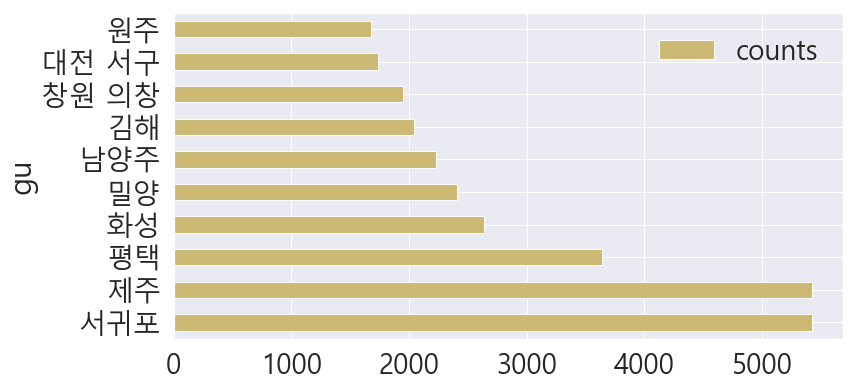

In [107]:
loc2.set_index('gu').head(10).plot(kind = 'barh', color = 'y', label = '', figsize = (12, 6))

In [116]:
# 다 더한 값 몇인지 보기
loc2.set_index('gu', inplace = True)

In [122]:
a = sum(loc2.values)

In [175]:
# 검증
count  = 0
for i in loc2.index:
    print('{0}(이)가 차지하고 있는 퍼센트 = {1}'.format(i, loc2.loc[i] / a * 100))
    count += loc2.loc[i] / a * 100

서귀포(이)가 차지하고 있는 퍼센트 = counts    3.318748
Name: 서귀포, dtype: float64
제주(이)가 차지하고 있는 퍼센트 = counts    3.318748
Name: 제주, dtype: float64
평택(이)가 차지하고 있는 퍼센트 = counts    2.227594
Name: 평택, dtype: float64
화성(이)가 차지하고 있는 퍼센트 = counts    1.613782
Name: 화성, dtype: float64
밀양(이)가 차지하고 있는 퍼센트 = counts    1.476087
Name: 밀양, dtype: float64
남양주(이)가 차지하고 있는 퍼센트 = counts    1.366543
Name: 남양주, dtype: float64
김해(이)가 차지하고 있는 퍼센트 = counts    1.25088
Name: 김해, dtype: float64
창원 의창(이)가 차지하고 있는 퍼센트 = counts    1.194578
Name: 창원 의창, dtype: float64
대전 서구(이)가 차지하고 있는 퍼센트 = counts    1.062391
Name: 대전 서구, dtype: float64
원주(이)가 차지하고 있는 퍼센트 = counts    1.024448
Name: 원주, dtype: float64
익산(이)가 차지하고 있는 퍼센트 = counts    1.002417
Name: 익산, dtype: float64
군산(이)가 차지하고 있는 퍼센트 = counts    0.997521
Name: 군산, dtype: float64
인천 서구(이)가 차지하고 있는 퍼센트 = counts    0.958967
Name: 인천 서구, dtype: float64
대전 유성(이)가 차지하고 있는 퍼센트 = counts    0.956519
Name: 대전 유성, dtype: float64
아산(이)가 차지하고 있는 퍼센트 = counts    0.931428
Name: 아산, dtype: float6

Name: 부산 북구, dtype: float64
서울 노원(이)가 차지하고 있는 퍼센트 = counts    0.280897
Name: 서울 노원, dtype: float64
부산 연제(이)가 차지하고 있는 퍼센트 = counts    0.277225
Name: 부산 연제, dtype: float64
김천(이)가 차지하고 있는 퍼센트 = counts    0.276001
Name: 김천, dtype: float64
군포(이)가 차지하고 있는 퍼센트 = counts    0.272941
Name: 군포, dtype: float64
용인 기흥(이)가 차지하고 있는 퍼센트 = counts    0.271106
Name: 용인 기흥, dtype: float64
용인 수지(이)가 차지하고 있는 퍼센트 = counts    0.271106
Name: 용인 수지, dtype: float64
용인 처인(이)가 차지하고 있는 퍼센트 = counts    0.270494
Name: 용인 처인, dtype: float64
서울 송파(이)가 차지하고 있는 퍼센트 = counts    0.268046
Name: 서울 송파, dtype: float64
태안(이)가 차지하고 있는 퍼센트 = counts    0.267434
Name: 태안, dtype: float64
대구 남구(이)가 차지하고 있는 퍼센트 = counts    0.266822
Name: 대구 남구, dtype: float64
보령(이)가 차지하고 있는 퍼센트 = counts    0.259478
Name: 보령, dtype: float64
서울 도봉(이)가 차지하고 있는 퍼센트 = counts    0.255194
Name: 서울 도봉, dtype: float64
영천(이)가 차지하고 있는 퍼센트 = counts    0.251522
Name: 영천, dtype: float64
울산 동구(이)가 차지하고 있는 퍼센트 = counts    0.242955
Name: 울산 동구, dtype: float64
광주 남구(이)

In [17]:
loc2

,gu,counts
0,서귀포,5423
1,제주,5423
2,평택,3640
3,화성,2637
4,밀양,2412
5,남양주,2233
6,김해,2044
7,창원 의창,1952
8,대전 서구,1736
9,원주,1674


In [6]:
loc2 = pd.read_excel('loc2.xlsx')

In [22]:
map = folium.Map(location=[35.5502, 126.982], zoom_start=11)

map.choropleth(geo_data=geo_str,
                data=loc2[2:],
                  columns=['gu', 'counts'],
               fill_color= 'YlGn', #PuRd, YlGnBu
               key_on='feature.id')
map

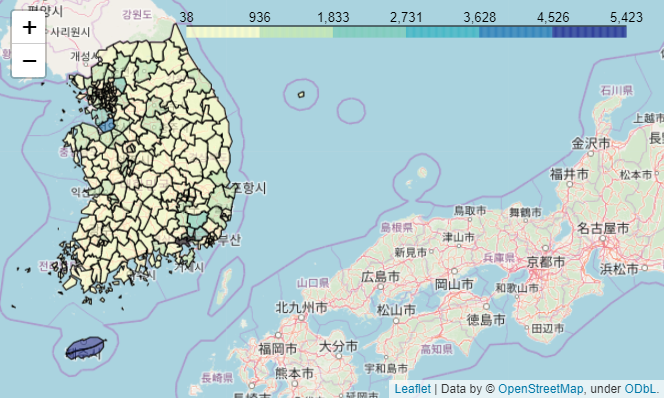